In [2]:

import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt

from py_package import py_module as pm

/usr/local/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
l_path = pm.PathMaker("Documents/CallCenterStaffing")

l_input_path = l_path.create_path("Input", "single_call_fact.csv")

l_call_df = pd.read_csv(l_input_path)

In [4]:
l_call_df.head(5)

,client_business_key,consultant_business_key,office_business_key,service_key,start_join_date_value,start_join_time_value,start_conv_date_value,start_conv_time_value,end_conn_date_value,end_conn_time_value,start_join_timestamp
0,SB048048025M,AA032048000E,CALMIC1286,transport,2019-03-06 00:00:00,0 days 11:30:05.000000000,2019-03-06 00:00:00,0 days 11:40:26.000000000,2019-03-06 00:00:00,0 days 12:24:07.000000000,2019-03-06 11:30:05
1,SB048048025M,AA032048000E,CALCHO0796,transport,2019-03-06 00:00:00,0 days 10:28:20.000000000,2019-03-06 00:00:00,0 days 10:39:38.000000000,2019-03-06 00:00:00,0 days 10:53:21.000000000,2019-03-06 10:28:20
2,SB048048025M,AA032048000E,CALCHO0796,reclamation,2019-03-04 00:00:00,0 days 16:03:25.000000000,2019-03-04 00:00:00,0 days 16:11:16.000000000,2019-03-04 00:00:00,0 days 16:32:27.000000000,2019-03-04 16:03:25
3,SB048048025M,AA032048000E,CALHIM2138,transport,2019-03-06 00:00:00,0 days 11:04:03.000000000,2019-03-06 00:00:00,0 days 11:15:28.000000000,2019-03-06 00:00:00,0 days 11:45:06.000000000,2019-03-06 11:04:03
4,SB048048025M,AA032048000E,CALLEN0538,biling,2019-03-09 00:00:00,0 days 12:51:50.000000000,2019-03-09 00:00:00,0 days 13:12:10.000000000,2019-03-09 00:00:00,0 days 14:10:17.000000000,2019-03-09 12:51:50


In [5]:
l_call_df["start_join_timestamp"] = [ datetime.datetime.strptime(l, "%Y-%m-%d %H:%M:%S") for l in l_call_df["start_join_timestamp"] ]

#l_call_df.head(5)
    
#          pd.to_datetime(l_call_df["time_value"], format = '%H:%M:%S').dt.hour]).size().plot()

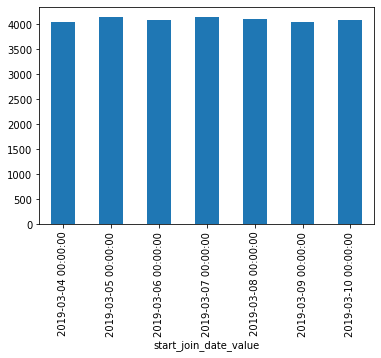

In [22]:
# Plot for every day in week

l_call_df.groupby(["start_join_date_value"]).size().plot(kind = "bar")
plt.show()

In [36]:
#plt.subplot(121)
# print(l_call_df.service_key.unique())
l = []
for s in l_call_df.service_key.unique():
    l.append(l_call_df[(l_call_df.service_key == s)].groupby(['start_join_date_value']).size())
    
l

# transport = l_call_df[(l_call_df.service_key == 'transport')].groupby(['start_join_date_value']).size() #.plot(kind = "bar")
# print(transport)

[start_join_date_value
 2019-03-04 00:00:00    464
 2019-03-05 00:00:00    427
 2019-03-06 00:00:00    394
 2019-03-07 00:00:00    388
 2019-03-08 00:00:00    401
 2019-03-09 00:00:00    415
 2019-03-10 00:00:00    422
 dtype: int64, start_join_date_value
 2019-03-04 00:00:00    441
 2019-03-05 00:00:00    425
 2019-03-06 00:00:00    377
 2019-03-07 00:00:00    392
 2019-03-08 00:00:00    433
 2019-03-09 00:00:00    376
 2019-03-10 00:00:00    405
 dtype: int64, start_join_date_value
 2019-03-04 00:00:00    422
 2019-03-05 00:00:00    399
 2019-03-06 00:00:00    428
 2019-03-07 00:00:00    434
 2019-03-08 00:00:00    415
 2019-03-09 00:00:00    398
 2019-03-10 00:00:00    404
 dtype: int64, start_join_date_value
 2019-03-04 00:00:00    405
 2019-03-05 00:00:00    420
 2019-03-06 00:00:00    426
 2019-03-07 00:00:00    437
 2019-03-08 00:00:00    418
 2019-03-09 00:00:00    421
 2019-03-10 00:00:00    415
 dtype: int64, start_join_date_value
 2019-03-04 00:00:00    388
 2019-03-05 00:00

In [8]:
l_call_df.plot(x = "start_join_date_value", )